## 数据分析二分类项目：成年人收入水平预测

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']

### 导入数据

In [2]:
df = pd.read_csv('adult.csv')

### 数据探索

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#### 目标值转为数值0和1

In [6]:
df["income"] = df["income"].apply(lambda s : s.strip())
df.loc[df["income"] == '>50K','target'] = 1
df.loc[df["income"] != '>50K','target'] = 0

df.drop(columns="income",inplace = True)
df['target'] = df['target'].astype('int64')

In [7]:
df.shape

(48842, 15)

In [8]:
df['target'].value_counts()

0    37155
1    11687
Name: target, dtype: int64

#### 查看收入类别分布

Text(0.5, 0, '收入类别分布')

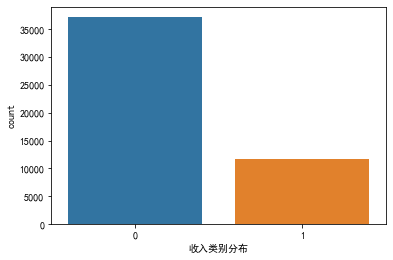

In [9]:
plt.figure()
ax = sns.countplot(x='target',data=df)
plt.xlabel("收入类别分布")

In [10]:
income = len(df)
income_1 = len(df[df['target']==1])
print("总收入人数:",income)
print("收入>50K人数:",income_1)
print("收入>50K人数占比:{:.2f}%".format((income_1/income)*100))

总收入人数: 48842
收入>50K人数: 11687
收入>50K人数占比:23.93%


#### 收入水平在年龄影响下的集中分布趋势

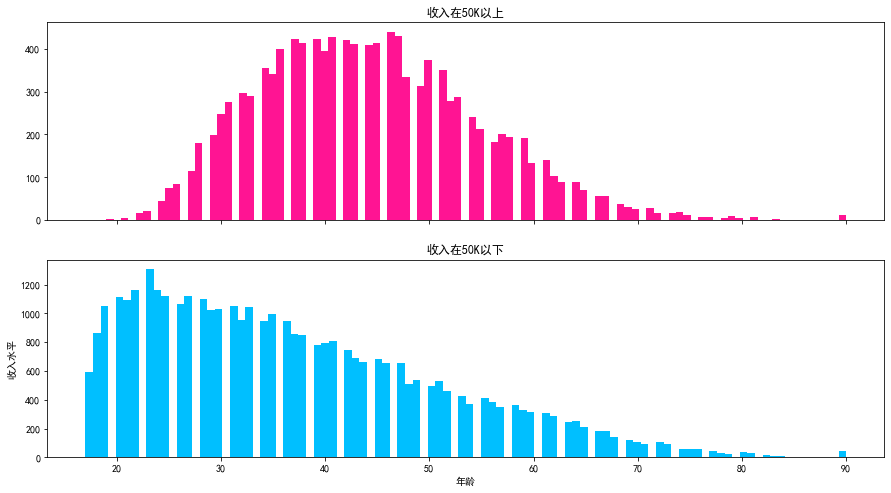

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))
bins = 100
ax1.hist(df.age[df.target == 1], bins = bins, color = 'deeppink')
ax1.set_title('收入在50K以上')
ax2.hist(df.age[df.target == 0], bins = bins, color = 'deepskyblue')
ax2.set_title('收入在50K以下')
plt.xlabel('年龄')
plt.ylabel('收入水平')
plt.show()

#### 收入水平在受教育程度影响下的集中分布趋势

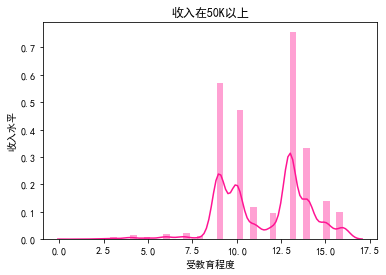

In [12]:
sns.distplot(df['educational-num'][df.target == 1],bins = 40,kde=True,color = 'deeppink')
plt.title('收入在50K以上')
plt.xlabel('受教育程度')
plt.ylabel('收入水平')
plt.show()

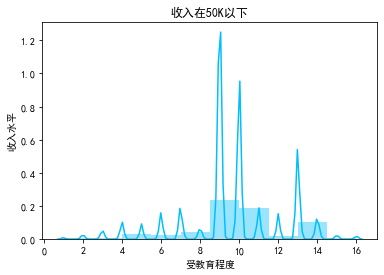

In [13]:
sns.distplot(df['educational-num'][df.target == 0],bins = 10,kde=True,color = 'deepskyblue')
plt.title('收入在50K以下')
plt.xlabel('受教育程度')
plt.ylabel('收入水平')
plt.show()

### 数据预处理

#### 离散特征进行热编码 one-hot-encode

In [13]:
cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 
               'gender','native-country']
num_columns = ['age','fnlwgt','educational-num','capital-gain', 'capital-loss', 'hours-per-week']
target_column = "target"

In [14]:
encode_df = pd.get_dummies(df,columns=cat_columns)

df_x = encode_df.drop(columns=target_column)
df_y = encode_df[target_column]

In [16]:
from sklearn.feature_extraction import DictVectorizer
dvec=DictVectorizer(sparse=False)
encode_df1=dvec.fit_transform(df.to_dict(orient='record'))
print(len(dvec.feature_names_))

109


#### 连续特征标准化 Z-score

In [16]:
num_mean = df_x[num_columns].mean()
num_std = df_x[num_columns].std()
num_normal = (df_x[num_columns] - num_mean)/num_std

df_x = df_x.drop(columns=num_columns)
df_x = pd.concat([df_x,num_normal],axis=1)

#### 训练和测试数据集划分

In [17]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(df_x,df_y,test_size=0.2)

In [18]:
train_x.shape

(39073, 108)

In [19]:
test_x.shape

(9769, 108)

### 创建模型

#### 训练模型

In [29]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log',max_iter=100)
clf.fit(train_x,train_y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=100,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

#### 准确率计算

In [30]:
clf.score(test_x,test_y)

0.8496263691268298

### 模型评估

#### 模型预测

In [22]:
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve,classification_report

In [31]:
predict = clf.predict_proba(test_x)[:,1]
predict_labels = clf.predict(test_x)

#### ROC评估指标

In [32]:
print(roc_auc_score(test_y,predict))

0.9059579402963439


#### 分类评估报告

In [33]:
print(classification_report(test_y,predict_labels))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7429
           1       0.74      0.58      0.65      2340

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769



#### 绘制精确率-召回率曲线 P-R curve

Text(0, 0.5, '精确率')

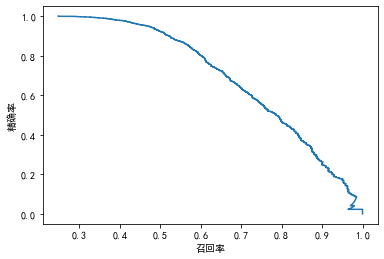

In [34]:
P,R,_ = precision_recall_curve(test_y,predict)
plt.plot(P,R)
plt.xlabel("召回率")
plt.ylabel("精确率")

#### 绘制ROC曲线

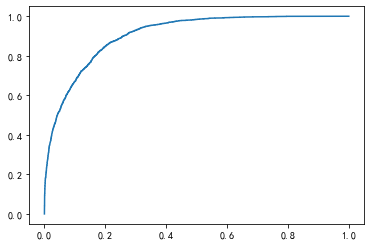

In [35]:
fpr,tpr,_ = roc_curve(test_y,predict)
plt.plot(fpr,tpr)

### 利用ID3和CART分类决策树拟合和评估模型

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=10)
dtc.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
from sklearn.metrics import accuracy_score
ID3_predict_labels = dtc.predict(test_x)

accuracy_score(test_y,ID3_predict_labels)

0.8584297266864571

In [54]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=10)
dtc.fit(train_x,train_y)

cart_predict_labels = dtc.predict(test_x)

accuracy_score(test_y,cart_predict_labels)

0.8595557375371071

### 探索成年人收入水平与各特征之间的因果关系

In [78]:
dtc.feature_importances_

array([2.44663961e-04, 1.16560872e-03, 1.04901740e-03, 0.00000000e+00,
       4.14144726e-04, 5.92419484e-04, 1.02493005e-02, 7.00383114e-04,
       0.00000000e+00, 1.89323303e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.09340687e-04, 2.80245075e-04, 1.12948562e-04,
       8.05095775e-04, 0.00000000e+00, 3.02957362e-03, 1.15040202e-04,
       1.55060634e-03, 3.68128645e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.10359226e-04, 1.72111108e-04, 3.88419915e-01,
       5.95371520e-04, 0.00000000e+00, 1.27004383e-04, 1.24792417e-05,
       0.00000000e+00, 1.08414286e-03, 0.00000000e+00, 1.08336330e-03,
       1.38117808e-02, 2.47438052e-03, 0.00000000e+00, 0.00000000e+00,
       2.37340287e-03, 0.00000000e+00, 2.52455556e-03, 1.07886891e-03,
       1.04268936e-03, 9.56159232e-04, 0.00000000e+00, 0.00000000e+00,
       6.59194323e-04, 4.77725922e-04, 0.00000000e+00, 1.84064323e-04,
       2.34329465e-03, 0.00000000e+00, 6.27775735e-04, 0.00000000e+00,
      

#### 对影响收入水平的重要特征进行排名

Text(0.5, 1.0, '最影响成年人收入水平的特征变量排名')

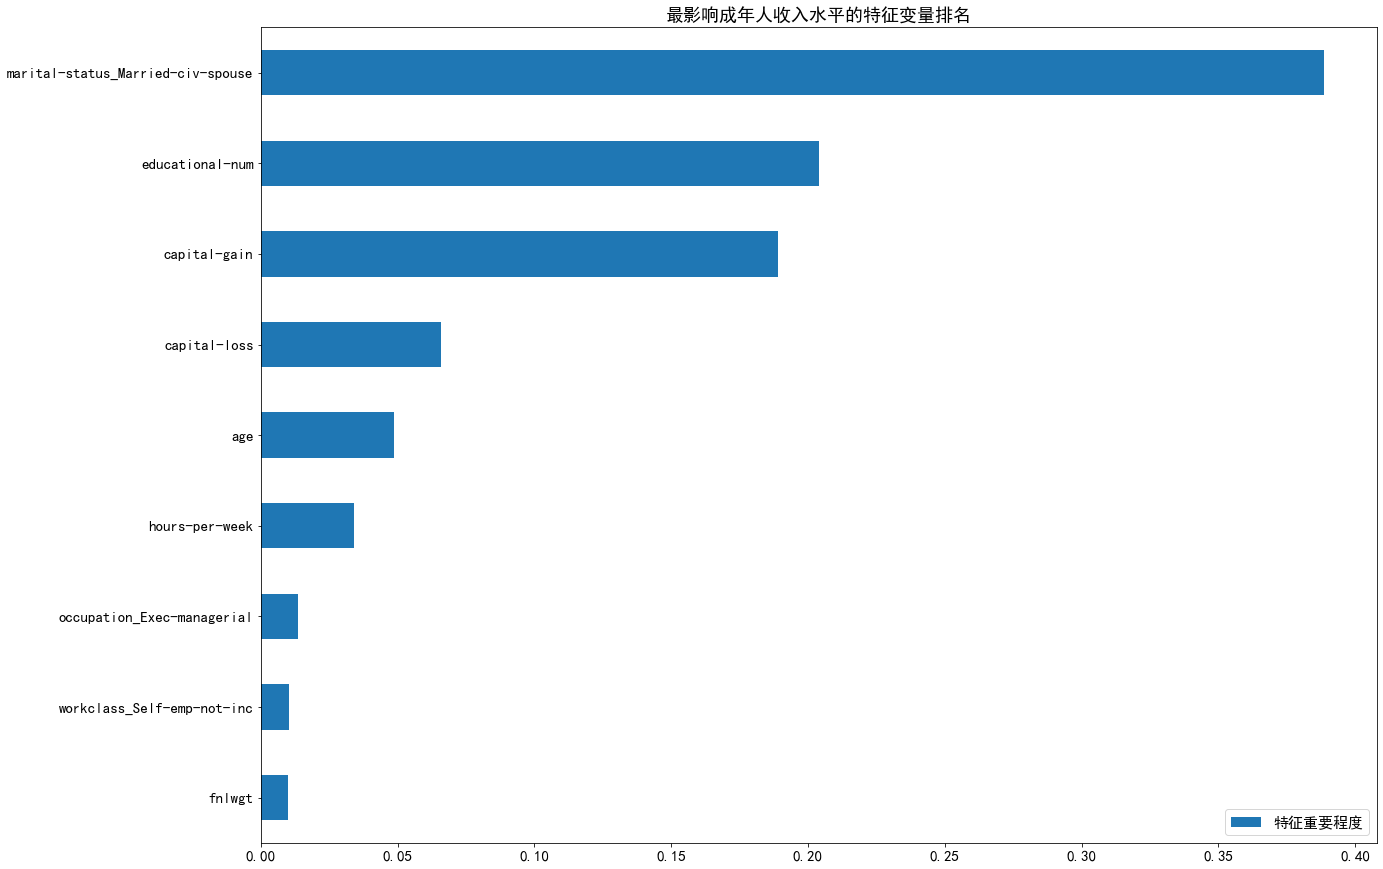

In [113]:
feature_importances = pd.DataFrame(data=dtc.feature_importances_,index=df_x.columns,columns=['特征重要程度'])
feature_importances = feature_importances[feature_importances['特征重要程度']>0.01]
plt.rcParams['figure.figsize'] = (20.0,15.0)
plt.rcParams['font.size'] = (15.0)
feature_importances.sort_values(by='特征重要程度',ascending=True).plot.barh()
plt.title("最影响成年人收入水平的特征变量排名")